<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep20-eda-modeling-submission?scriptVersionId=139327270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Exploration](#4)

[5. Baseline Modeling 1.0](#5)

[6. Baseline Modeling 2.0](#6)

[7. Baseline Modeling 3.0](#7)

[8. Baseline Modeling 3.0](#8)

<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

- Version 1 (08/01/2023)
    * EDA 
    
    
- Version 2 (08/01/2023)
    * Baseline modeling 1.0 added
    
    
- Version 3 (08/02/2023)
    * Baseline modeling 2.0 added
    

- Version 4 (08/07/2023)
    * Baseline modeling 3.0 added
    

- Version 5 (08/07/2023)
    * Fixing bug
    
    
- Version 6 (08/07/2023)
    * Fixing bug
    
    
- Version 7 (08/08/2023)
    * Baseline modeling 4.0 added
    
    
- Version 8 (08/08/2023)
    * Fixing bug
    
<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold, GroupKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e20/train.csv')
test = pd.read_csv('../input/playground-series-s3e20/test.csv')
submission = pd.read_csv('../input/playground-series-s3e20/sample_submission.csv')

print('The dimension of the train synthetic dataset is:', train.shape)
print('The dimension of the test synthetic dataset is:', test.shape)
print('The dimension of the submission dataset is:', submission.shape)

The dimension of the train synthetic dataset is: (79023, 76)
The dimension of the test synthetic dataset is: (24353, 75)
The dimension of the submission dataset is: (24353, 2)


In [3]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

At a first glance, we can see that there are many missing values in the `train` dataset. Next, we count the number of missing values in each of the features.

In [4]:
100*train.isna().sum().sort_values(ascending = False) / train.shape[0]

UvAerosolLayerHeight_aerosol_height          99.444466
UvAerosolLayerHeight_solar_zenith_angle      99.444466
UvAerosolLayerHeight_solar_azimuth_angle     99.444466
UvAerosolLayerHeight_sensor_azimuth_angle    99.444466
UvAerosolLayerHeight_aerosol_pressure        99.444466
                                               ...    
latitude                                      0.000000
week_no                                       0.000000
year                                          0.000000
longitude                                     0.000000
emission                                      0.000000
Length: 76, dtype: float64

Notice that there are only 6 features with no missing values in the `train` dataset. Next, we explore if there are missing values in the `test` dataset.

In [5]:
100*test.isna().sum().sort_values(ascending = False) / test.shape[0]

UvAerosolLayerHeight_aerosol_pressure         91.405576
UvAerosolLayerHeight_aerosol_optical_depth    91.405576
UvAerosolLayerHeight_sensor_zenith_angle      91.405576
UvAerosolLayerHeight_sensor_azimuth_angle     91.405576
UvAerosolLayerHeight_aerosol_height           91.405576
                                                ...    
latitude                                       0.000000
week_no                                        0.000000
year                                           0.000000
longitude                                      0.000000
ID_LAT_LON_YEAR_WEEK                           0.000000
Length: 75, dtype: float64

In the `test` dataset, there are only 5 features with no missing values.

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

First, we start by visualizing `emission`, the variable of interest.

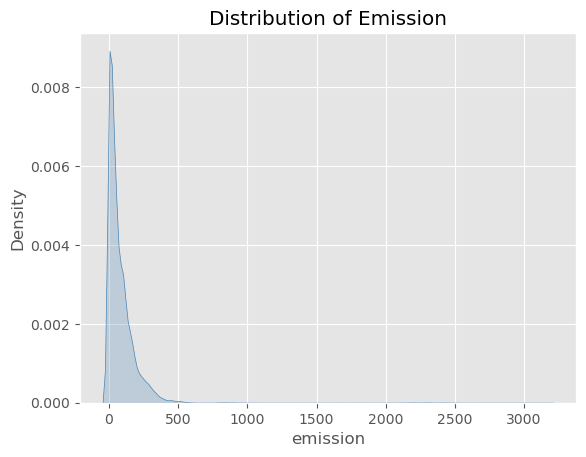

In [6]:
sns.kdeplot(data = train, x = 'emission', fill = True, color = 'steelblue').set_title('Distribution of Emission');

From the above, we see the distribution of `emission` is right-skewed. We next proceed to visualize the distribution of `emission` over time.

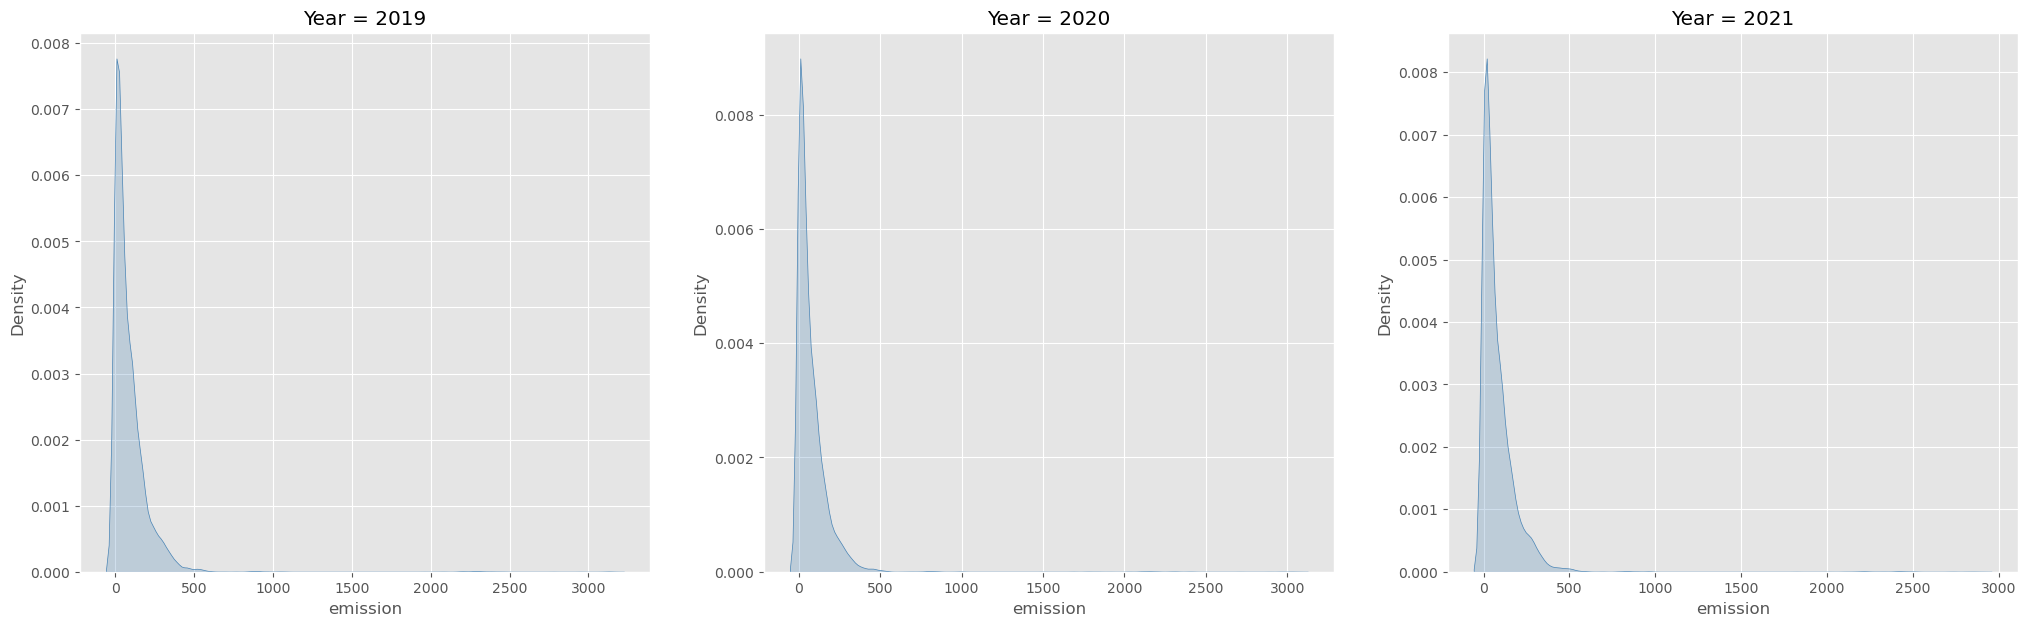

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.kdeplot(ax = axes[0], data = train[train['year'] == 2019], x = 'emission', fill = True, color = 'steelblue').set_title('Year = 2019')
sns.kdeplot(ax = axes[1], data = train[train['year'] == 2020], x = 'emission', fill = True, color = 'steelblue').set_title('Year = 2020')
sns.kdeplot(ax = axes[2], data = train[train['year'] == 2021], x = 'emission', fill = True, color = 'steelblue').set_title('Year = 2021');

From the above, there is not an obvious change in the distribution of `emission` from year to year. Next, we visualize average `emission` by week of the year.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


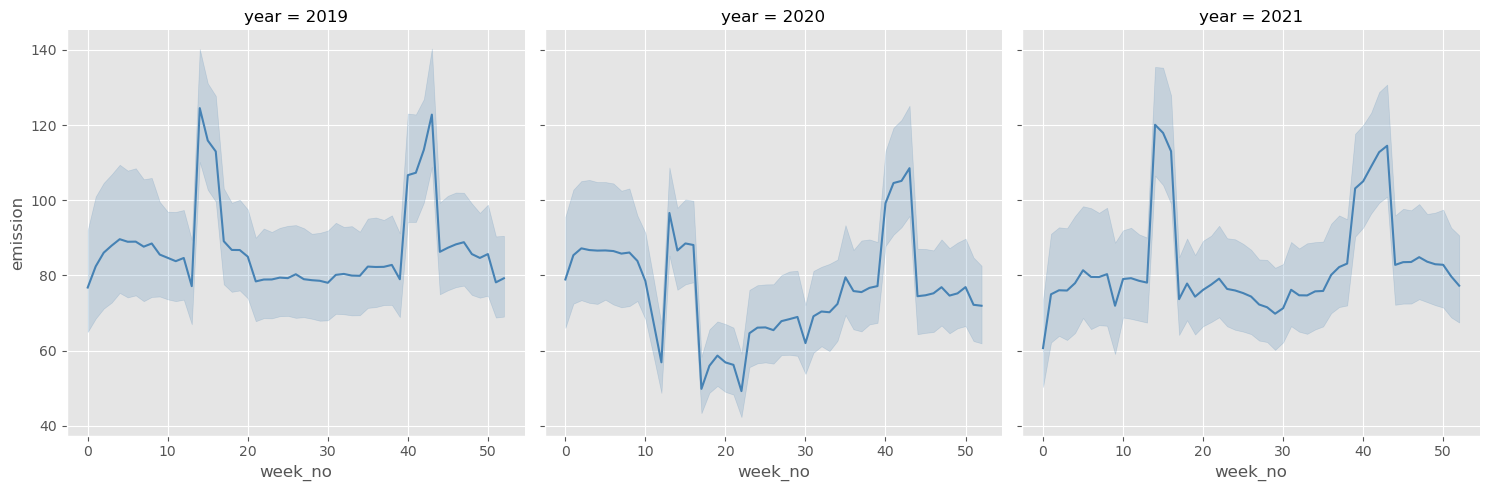

In [8]:
sns.relplot(data = train, x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'steelblue');

From the above, we see the following:

- In 2019, 2020 and 2021, weeks 14, 15, 16, 41, 42, and 42 spike.
- The `emission` in 2019 and 2021 look similar.
- The `emission` in 2020 look different from the other two years (probably due to COVID).

Next, we visualize `emission` in each location.

In [9]:
fig = px.scatter_mapbox(train[train['year'] == 2019], 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'emission',
                        animation_frame = 'week_no',
                        zoom = 6)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

From the above animated chart, it seems that emission spike only in some locations, regardless of the `year`. Next, we explore the correlation between the different group of features and `emission`. First, we explore the relationship between and `SulphurDioxide` features and `emission`.

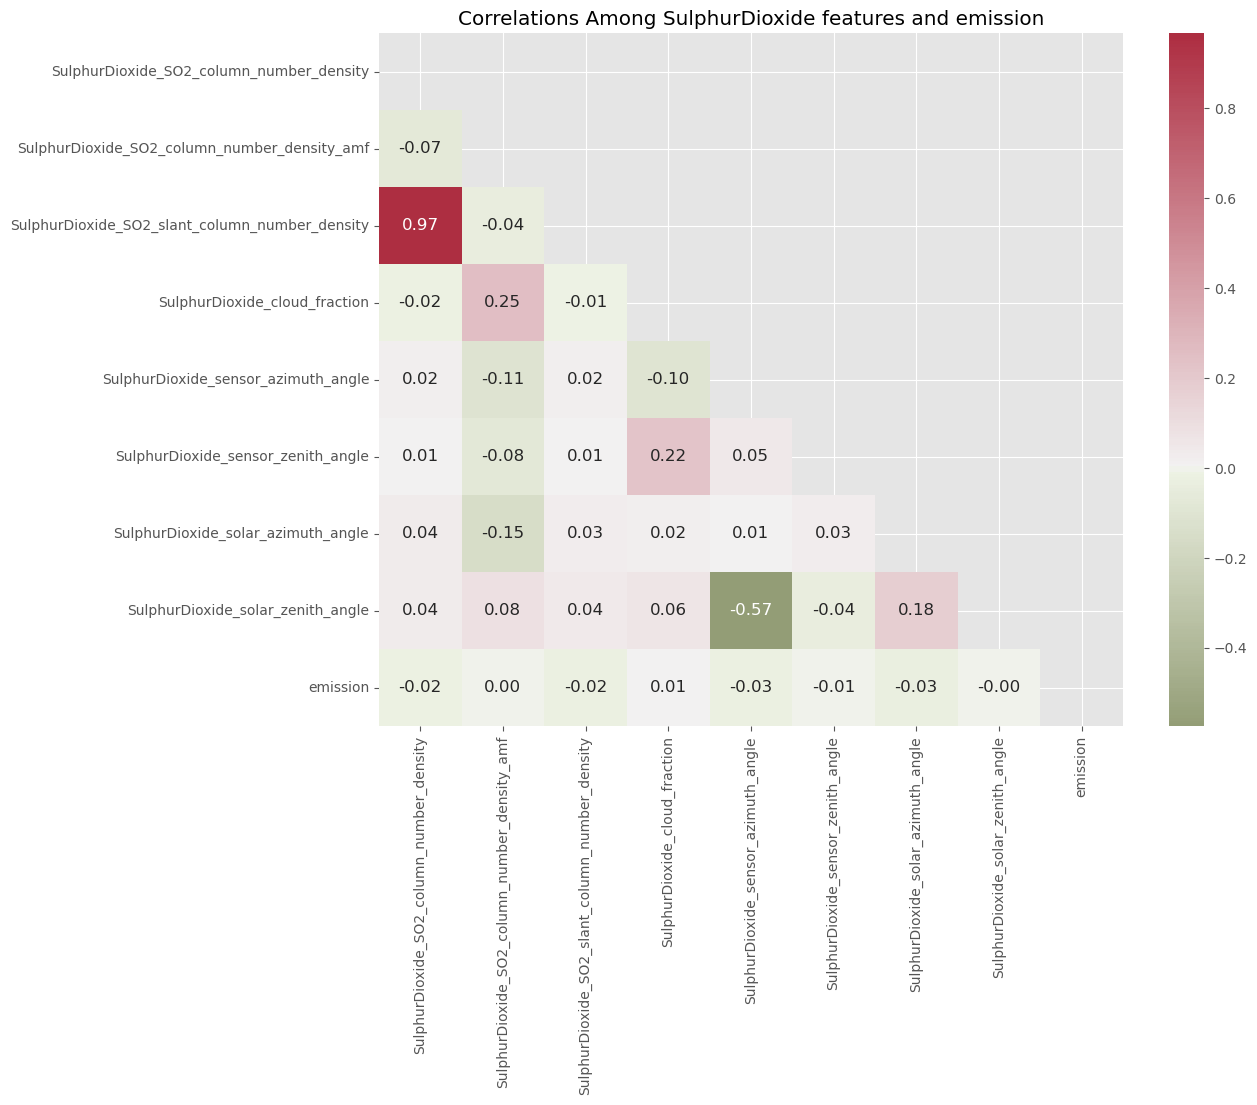

In [10]:
corr_mat = train[['SulphurDioxide_SO2_column_number_density',
                  'SulphurDioxide_SO2_column_number_density_amf',
                  'SulphurDioxide_SO2_slant_column_number_density',
                  'SulphurDioxide_cloud_fraction',
                  'SulphurDioxide_sensor_azimuth_angle',
                  'SulphurDioxide_sensor_zenith_angle',
                  'SulphurDioxide_solar_azimuth_angle',
                  'SulphurDioxide_solar_zenith_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among SulphurDioxide features and emission');

From the above, we see that none of the `SulphurDioxide` features are correlated with `emission`. 

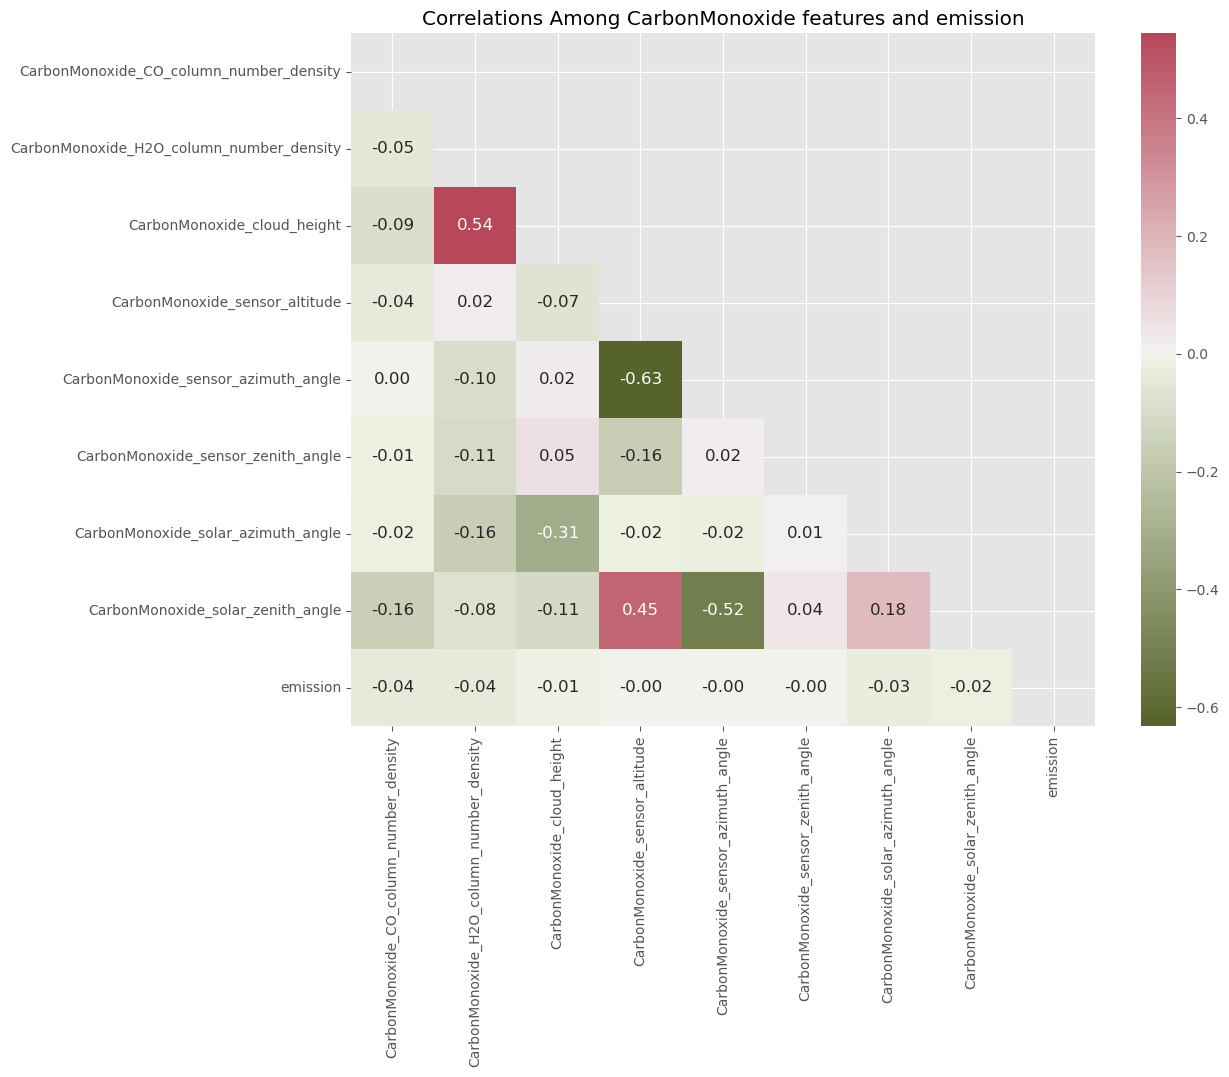

In [11]:
corr_mat = train[['CarbonMonoxide_CO_column_number_density',
                  'CarbonMonoxide_H2O_column_number_density',
                  'CarbonMonoxide_cloud_height',
                  'CarbonMonoxide_sensor_altitude',
                  'CarbonMonoxide_sensor_azimuth_angle',
                  'CarbonMonoxide_sensor_zenith_angle',
                  'CarbonMonoxide_solar_azimuth_angle',
                  'CarbonMonoxide_solar_zenith_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among CarbonMonoxide features and emission');

From the above, we see that none of the `CarbonMonoxide` features are correlated with `emission`. 

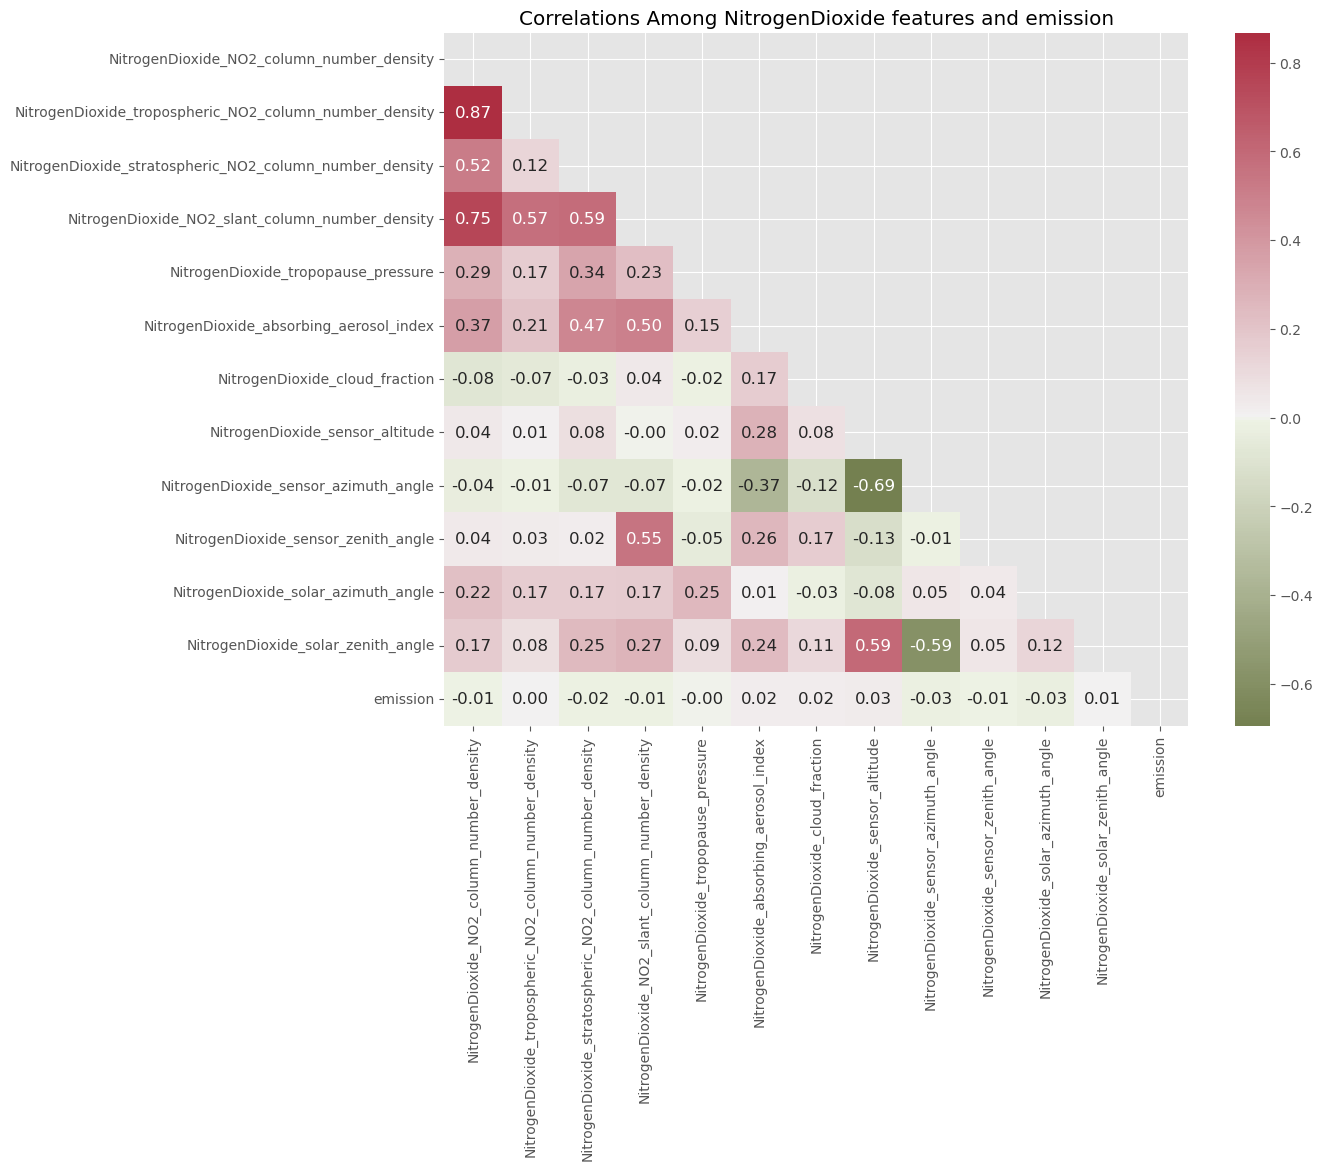

In [12]:
corr_mat = train[['NitrogenDioxide_NO2_column_number_density',
                  'NitrogenDioxide_tropospheric_NO2_column_number_density',
                  'NitrogenDioxide_stratospheric_NO2_column_number_density',
                  'NitrogenDioxide_NO2_slant_column_number_density',
                  'NitrogenDioxide_tropopause_pressure',
                  'NitrogenDioxide_absorbing_aerosol_index',
                  'NitrogenDioxide_cloud_fraction',
                  'NitrogenDioxide_sensor_altitude',
                  'NitrogenDioxide_sensor_azimuth_angle',
                  'NitrogenDioxide_sensor_zenith_angle',
                  'NitrogenDioxide_solar_azimuth_angle',
                  'NitrogenDioxide_solar_zenith_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among NitrogenDioxide features and emission');

From the above, we see that none of the `NitrogenDioxide` features are correlated with `emission`. 

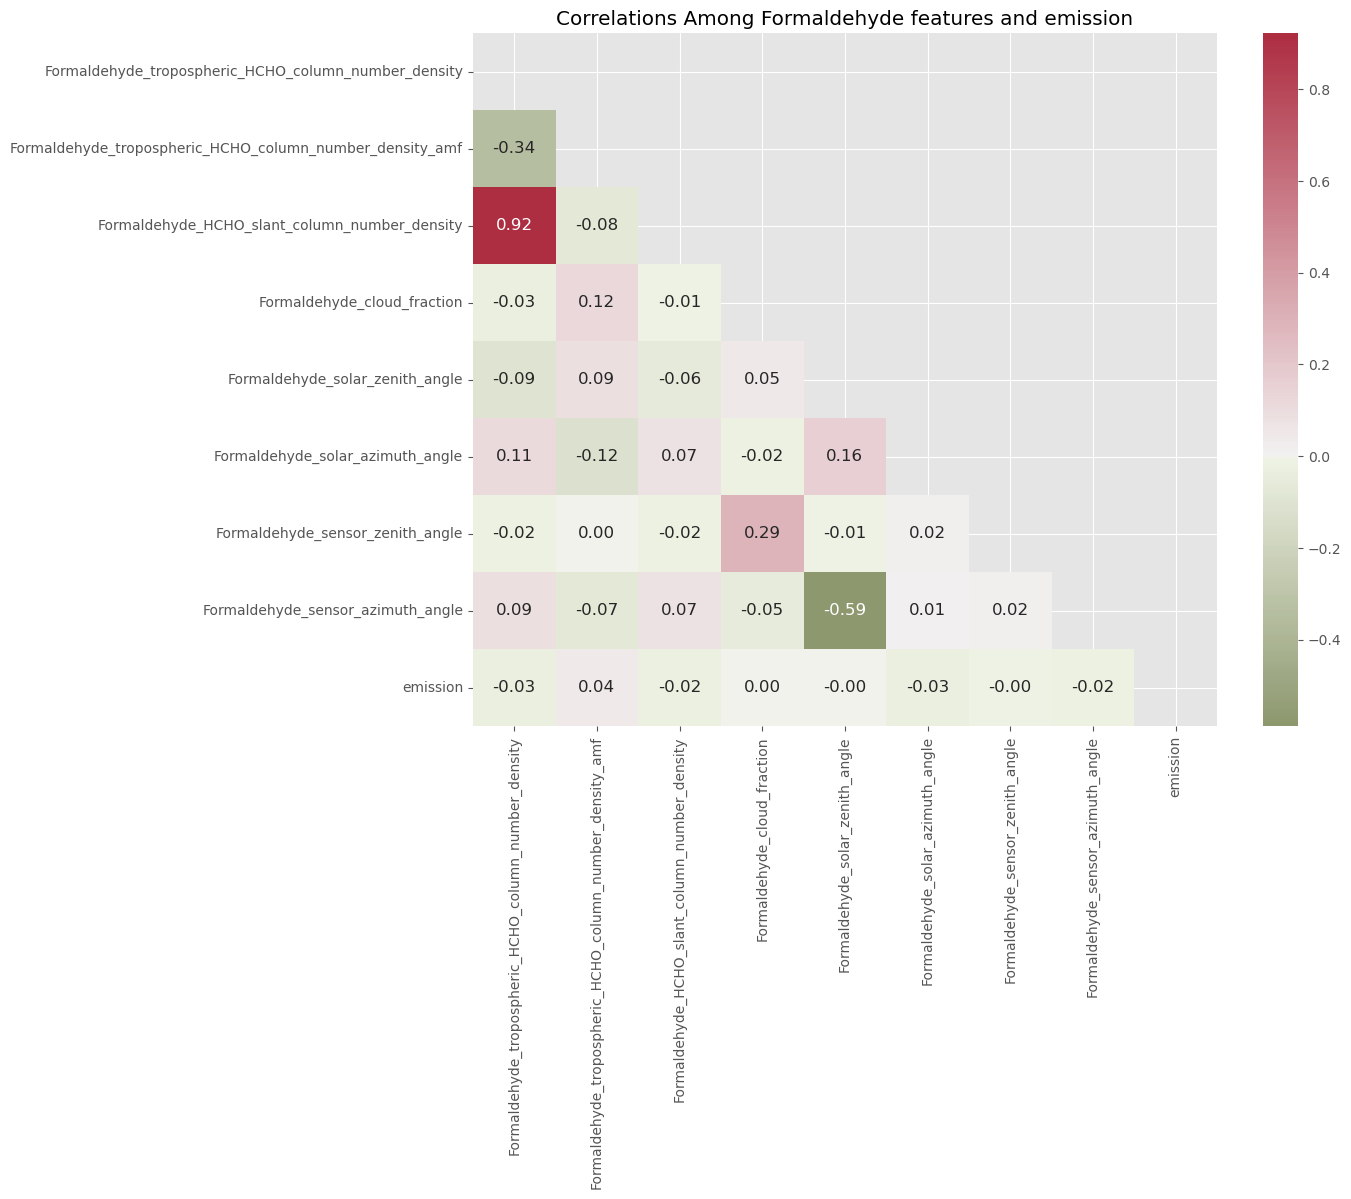

In [13]:
corr_mat = train[['Formaldehyde_tropospheric_HCHO_column_number_density',
                  'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
                  'Formaldehyde_HCHO_slant_column_number_density',
                  'Formaldehyde_cloud_fraction',
                  'Formaldehyde_solar_zenith_angle',
                  'Formaldehyde_solar_azimuth_angle',
                  'Formaldehyde_sensor_zenith_angle',
                  'Formaldehyde_sensor_azimuth_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Formaldehyde features and emission');

From the above, we see that none of the `Formaldehyde` features are correlated with `emission`. 

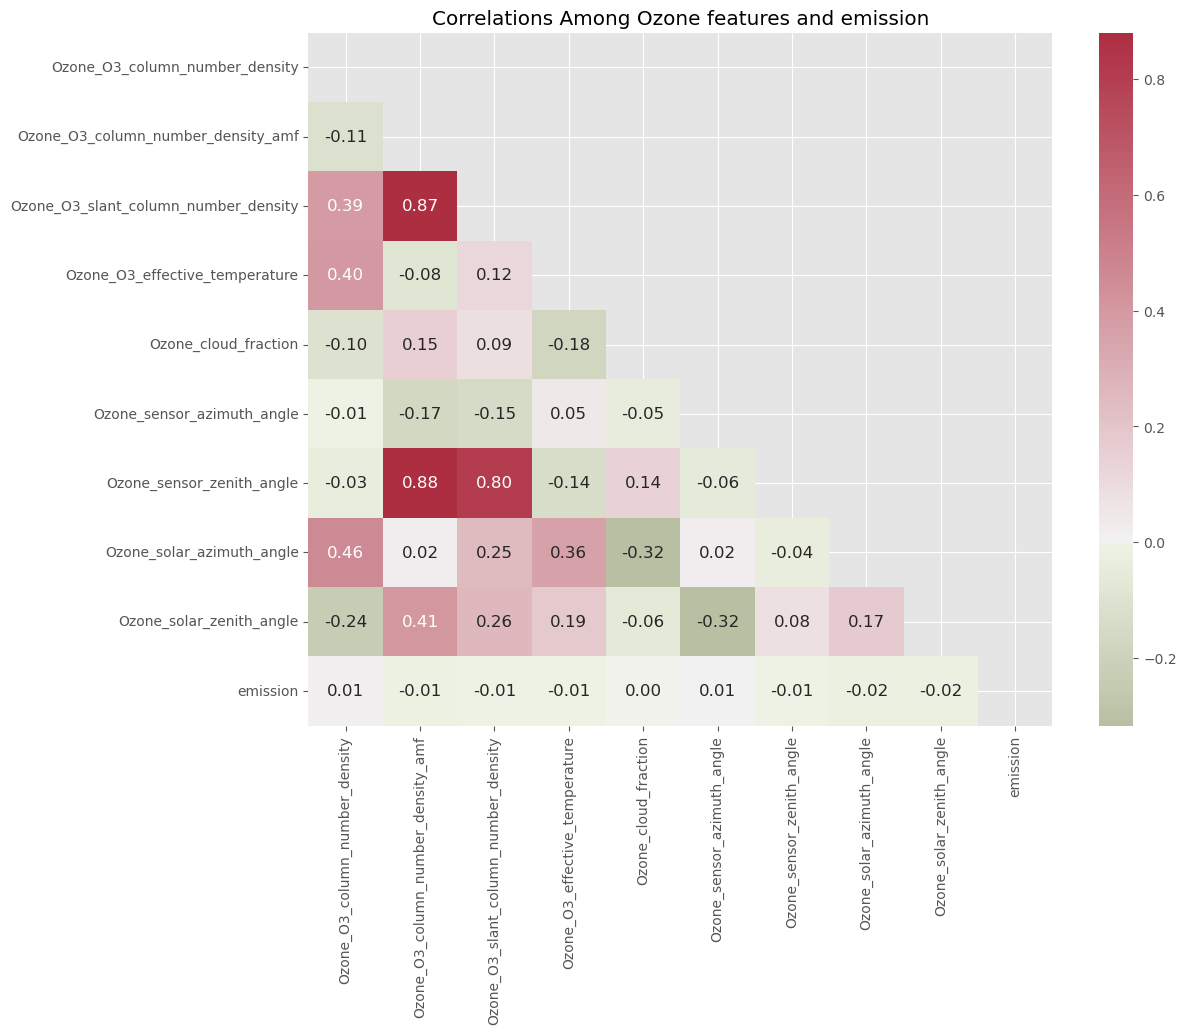

In [14]:
corr_mat = train[['Ozone_O3_column_number_density',
                  'Ozone_O3_column_number_density_amf',
                  'Ozone_O3_slant_column_number_density',
                  'Ozone_O3_effective_temperature',
                  'Ozone_cloud_fraction',
                  'Ozone_sensor_azimuth_angle',
                  'Ozone_sensor_zenith_angle',
                  'Ozone_solar_azimuth_angle',
                  'Ozone_solar_zenith_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Ozone features and emission');

From the above, we see that none of the `Ozone` features are correlated with `emission`. 

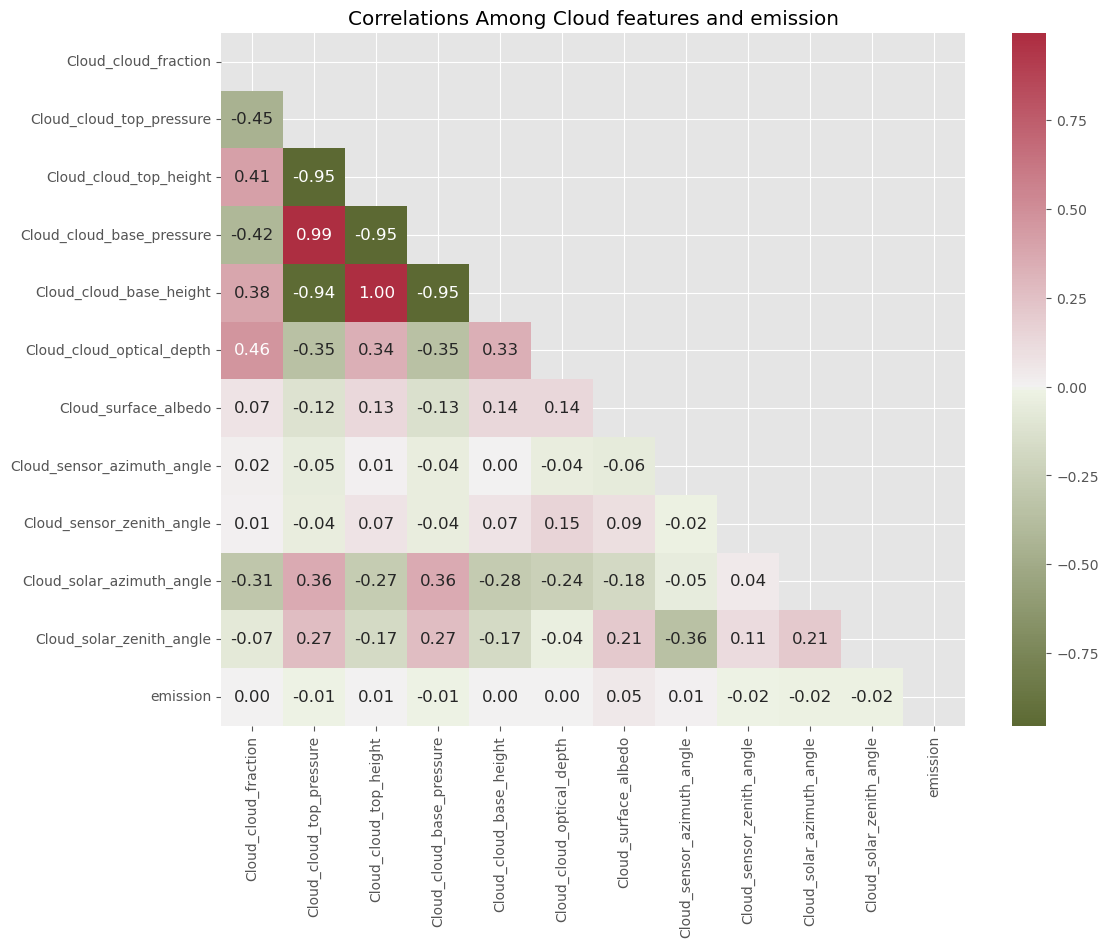

In [15]:
corr_mat = train[['Cloud_cloud_fraction',
                  'Cloud_cloud_top_pressure',
                  'Cloud_cloud_top_height',
                  'Cloud_cloud_base_pressure',
                  'Cloud_cloud_base_height',
                  'Cloud_cloud_optical_depth',
                  'Cloud_surface_albedo',
                  'Cloud_sensor_azimuth_angle',
                  'Cloud_sensor_zenith_angle',
                  'Cloud_solar_azimuth_angle',
                  'Cloud_solar_zenith_angle', 'emission']].corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Cloud features and emission');

From the above, we see that none of the `Cloud` features are correlated with `emission`. 

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>

We first start by building a no-machine-learning approach to forecast `emission` based on location and `week_no`.

In [16]:
train['location'] = [str(train['latitude'][i]) + '_' + str(train['longitude'][i]) for i in range(0, train.shape[0])]
test['location'] = [str(test['latitude'][i]) + '_' + str(test['longitude'][i]) for i in range(0, test.shape[0])]

train['location'] = train['location'].astype('category')
test['location'] = test['location'].astype('category')

train_agg = pd.DataFrame(train.groupby(['location', 'week_no'])['emission'].mean()).reset_index()
train_agg.head()

,location,week_no,emission
0,-0.51_29.29,0,3.608051
1,-0.51_29.29,1,4.016319
2,-0.51_29.29,2,4.138755
3,-0.51_29.29,3,4.184737
4,-0.51_29.29,4,4.247569


In [17]:
test_out = test[['ID_LAT_LON_YEAR_WEEK', 'location', 'week_no']].copy()
test_out.head()

,ID_LAT_LON_YEAR_WEEK,location,week_no
0,ID_-0.510_29.290_2022_00,-0.51_29.29,0
1,ID_-0.510_29.290_2022_01,-0.51_29.29,1
2,ID_-0.510_29.290_2022_02,-0.51_29.29,2
3,ID_-0.510_29.290_2022_03,-0.51_29.29,3
4,ID_-0.510_29.290_2022_04,-0.51_29.29,4


In [18]:
test_out = pd.merge(test_out, train_agg, on = ['location', 'week_no'], how = 'left')
test_out.head()

,ID_LAT_LON_YEAR_WEEK,location,week_no,emission
0,ID_-0.510_29.290_2022_00,-0.51_29.29,0,3.608051
1,ID_-0.510_29.290_2022_01,-0.51_29.29,1,4.016319
2,ID_-0.510_29.290_2022_02,-0.51_29.29,2,4.138755
3,ID_-0.510_29.290_2022_03,-0.51_29.29,3,4.184737
4,ID_-0.510_29.290_2022_04,-0.51_29.29,4,4.247569


In [19]:
test_out.drop(columns = ['location', 'week_no'], axis = 1, inplace = True)
test_out.to_csv('Baseline_mean_agg_submission.csv', index = False)

<a id="6"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 2.0</h1>

In this section, we build a baseline model using `LightGBM` and a couple of features. First, we engineer a couple of features.

In [20]:
train['covid_flag'] = np.where((train['year'] == 2020) & (train['week_no'] >= 11) & (train['week_no'] <= 40), 1, 0)
test['covid_flag'] = 0

train['week_no_sin'] = np.sin(train['week_no']*(2*np.pi/52))
train['week_no_cos'] = np.cos(train['week_no']*(2*np.pi/52))

test['week_no_sin'] = np.sin(test['week_no']*(2*np.pi/52))
test['week_no_cos'] = np.cos(test['week_no']*(2*np.pi/52))

Next, we proceed to run the cv-routine.

In [21]:
X = train[['year', 'week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos']].copy()
Y = train['emission']

test_baseline = test[['week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos']].copy()

lgb_cv_scores, lgb_preds, lgb_imp = list(), list(), list()

kf = GroupKFold(n_splits = 3)

for i, (trn_idx, test_idx) in enumerate(kf.split(X, groups = X.year)):
    
    X_train, X_valid = X.iloc[trn_idx], X.iloc[test_idx]
    Y_train, Y_valid = Y.iloc[trn_idx], Y.iloc[test_idx]
    
    X_train = X_train.drop(columns = 'year', axis = 1)
    X_valid = X_valid.drop(columns = 'year', axis = 1)
        
    print('---------------------------------------------------------------')
            
    ##############
    ## LightGBM ##
    ##############
    
    lgb_md = LGBMRegressor(n_estimators = 1000,
                           max_depth = 15,
                           learning_rate = 0.01,
                           num_leaves = 105,
                           reg_alpha = 0.1,
                           reg_lambda = 0.1,
                           subsample = 0.7,
                           colsample_bytree = 0.8).fit(X_train, Y_train)
    
    lgb_pred_1 = lgb_md.predict(X_valid)
    lgb_pred_2 = lgb_md.predict(test_baseline)
    
    lgb_score_fold = mean_squared_error(Y_valid, lgb_pred_1, squared = False)
    lgb_cv_scores.append(lgb_score_fold)
    lgb_preds.append(lgb_pred_2)
    lgb_imp.append(lgb_md.feature_importances_)
    
    print('Fold', i, '==> LGBM oof RMSE is ==>', lgb_score_fold)
    
print('\n')    
print('The oof RMSE of the model is', np.mean(lgb_cv_scores))

---------------------------------------------------------------
Fold 0 ==> LGBM oof RMSE is ==> 16.771641932373477
---------------------------------------------------------------
Fold 1 ==> LGBM oof RMSE is ==> 27.85741025897529
---------------------------------------------------------------
Fold 2 ==> LGBM oof RMSE is ==> 17.164752140566275


The oof RMSE of the model is 20.597934777305014


Next, we visualize the importance of each of the features.

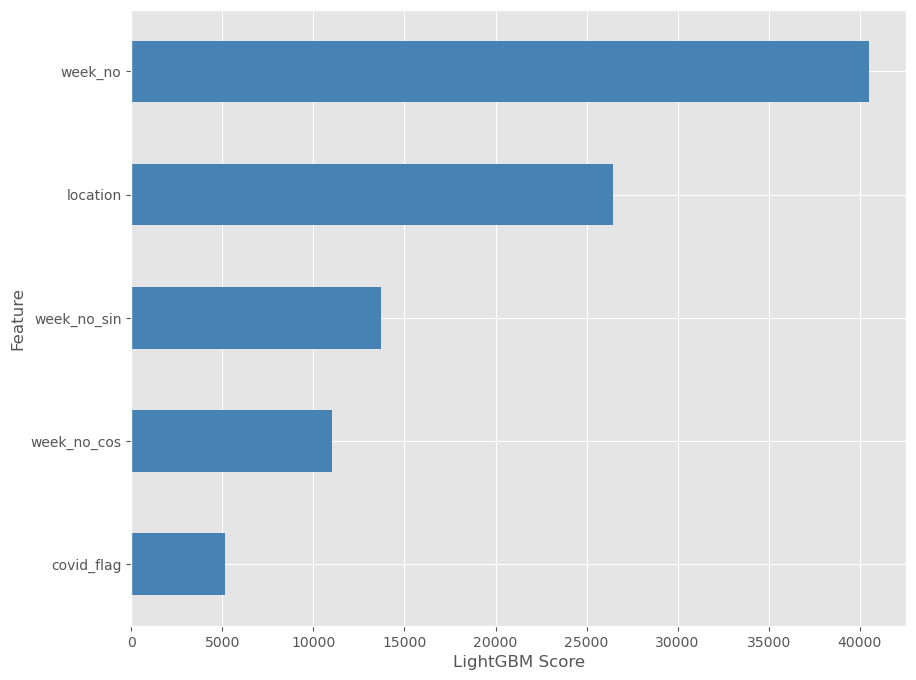

In [22]:
plt.figure(figsize = (10, 8))
pd.DataFrame(lgb_imp, columns = X.columns[1:]).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh', color = 'steelblue');
plt.xlabel('LightGBM Score')
plt.ylabel('Feature')
plt.show();

In [23]:
preds_test = pd.DataFrame(lgb_preds).apply(np.mean, axis = 0)
submission['emission'] = preds_test
submission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,1.555790
1,ID_-0.510_29.290_2022_01,4.324840
2,ID_-0.510_29.290_2022_02,4.166358
3,ID_-0.510_29.290_2022_03,4.405986
4,ID_-0.510_29.290_2022_04,4.963991


In [24]:
submission.to_csv('LightGBM_Baseline_submission.csv', index = False)

<a id="7"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 3.0</h1>

In this section, we model the data without the two time-series that are very different from the other ones. By now, we all know that there are two locations that have very different carbon emissions. The first outlier is the location with `latitude = -2.079` and `longitute = 29.321`.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1800x800 with 0 Axes>

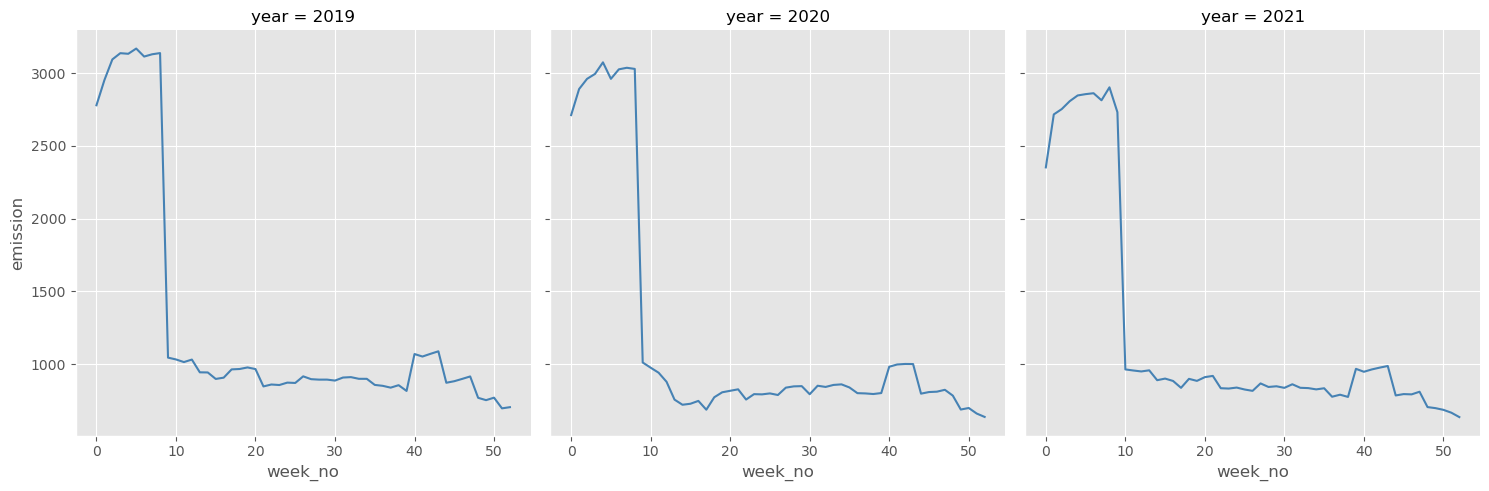

In [25]:
plt.figure(figsize = (18, 8))

sns.relplot(data = train[train['location'] == '-2.079_29.321'], x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'steelblue');

The three time-series are very similar. However, when comparing the 2020 to 2021 weekly emission numbers, the 2021 weekly emission number are smaller. Notice that the pattern is similar when compared 2019 with 2020 emission numbers. The second outlier is the location with `latitude = -2.378` and `longitute = 29.222`.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1800x800 with 0 Axes>

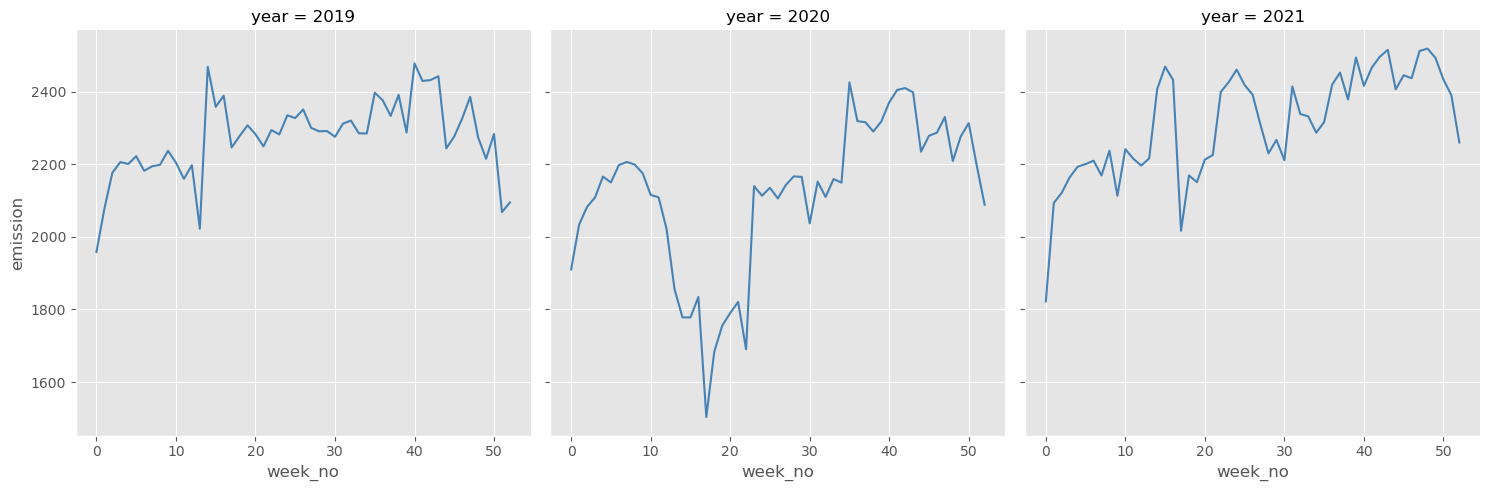

In [26]:
plt.figure(figsize = (18, 8))

sns.relplot(data = train[train['location'] == '-2.378_29.222'], x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'steelblue');

The overall pattern of the three time-series are similar (with 2020 having smaller emission numbers due to COVID). Next, we remove these two location from the `train` dataset for modeling purposes. 

In [27]:
outliers = ['-2.079_29.321', '-2.378_29.222']

train_no_outlier = train[~np.isin(train['location'], outliers)].copy()
test_no_outlier = test[~np.isin(test['location'], outliers)].copy()

X = train_no_outlier[['year', 'week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos']].copy()
Y = train_no_outlier['emission']

test_baseline = test_no_outlier[['week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos']].copy()

lgb_cv_scores, lgb_preds= list(), list()

kf = GroupKFold(n_splits = 3)

for i, (trn_idx, test_idx) in enumerate(kf.split(X, groups = X.year)):
    
    X_train, X_valid = X.iloc[trn_idx], X.iloc[test_idx]
    Y_train, Y_valid = Y.iloc[trn_idx], Y.iloc[test_idx]
    
    X_train = X_train.drop(columns = 'year', axis = 1)
    X_valid = X_valid.drop(columns = 'year', axis = 1)
        
    print('---------------------------------------------------------------')
            
    ##############
    ## LightGBM ##
    ##############
    
    lgb_md = LGBMRegressor(n_estimators = 9430,
                           max_depth = 6,
                           learning_rate = 0.01,
                           num_leaves = 79,
                           min_child_samples = 2,
                           reg_alpha = 1.9, 
                           reg_lambda = 0.06,
                           subsample = 0.26,
                           colsample_bytree = 0.7).fit(X_train, Y_train)
    
    lgb_pred_1 = lgb_md.predict(X_valid)
    lgb_pred_2 = lgb_md.predict(test_baseline)
    
    lgb_score_fold = mean_squared_error(Y_valid, lgb_pred_1, squared = False)
    lgb_cv_scores.append(lgb_score_fold)
    lgb_preds.append(lgb_pred_2)
    
    print('Fold', i, '==> LGBM oof RMSE is ==>', lgb_score_fold)

print('\n')    
print('The oof RMSE of the model is', np.mean(lgb_cv_scores))

---------------------------------------------------------------
Fold 0 ==> LGBM oof RMSE is ==> 14.16678376478521
---------------------------------------------------------------
Fold 1 ==> LGBM oof RMSE is ==> 23.631316829283467
---------------------------------------------------------------
Fold 2 ==> LGBM oof RMSE is ==> 13.471480012387312


The oof RMSE of the model is 17.089860202151996


First, we agregate the predictions of the no-outlier locations.

In [28]:
preds_test = pd.DataFrame(lgb_preds).apply(np.mean, axis = 0)
test_no_outlier = test_no_outlier.reset_index()
test_no_outlier['emission'] = preds_test
test_no_outlier['emission'] = np.where(test_no_outlier['emission'] < 0, 0, test_no_outlier['emission'])
test_no_outlier = test_no_outlier[['ID_LAT_LON_YEAR_WEEK', 'emission']].copy()
test_no_outlier.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.904796
1,ID_-0.510_29.290_2022_01,4.089357
2,ID_-0.510_29.290_2022_02,3.991456
3,ID_-0.510_29.290_2022_03,4.081920
4,ID_-0.510_29.290_2022_04,4.179405


Then, we use historical data to make predictions on the two-outlier locations.

In [29]:
test_outlier = test[np.isin(test['location'], outliers)].copy()
test_outlier['emission'] = np.nan
test_outlier.loc[test_outlier['location'] == '-2.079_29.321', 'emission'] = 0.95*train[(train['location'] == '-2.079_29.321') & (train['year'] == 2021) & (train['week_no'] <= 48)]['emission'].values
test_outlier.loc[test_outlier['location'] == '-2.378_29.222', 'emission'] = train[(train['location'] == '-2.378_29.222') & (train['year'] != 2020) & (train['week_no'] <= 48)].groupby('week_no')['emission'].mean().values
test_outlier = test_outlier[['ID_LAT_LON_YEAR_WEEK', 'emission']].copy()
test_outlier

,ID_LAT_LON_YEAR_WEEK,emission
14357,ID_-2.079_29.321_2022_00,2233.788200
14358,ID_-2.079_29.321_2022_01,2579.599315
14359,ID_-2.079_29.321_2022_02,2614.372450
14360,ID_-2.079_29.321_2022_03,2665.781130
14361,ID_-2.079_29.321_2022_04,2703.264425
...,...,...
17537,ID_-2.378_29.222_2022_44,2325.100350
17538,ID_-2.378_29.222_2022_45,2361.007700
17539,ID_-2.378_29.222_2022_46,2381.861100
17540,ID_-2.378_29.222_2022_47,2449.024900


Finally, we append the predictions to the `subsmission` dataset.

In [30]:
submission = pd.merge(submission, test_no_outlier, on = 'ID_LAT_LON_YEAR_WEEK', how = 'left')
submission = pd.merge(submission, test_outlier, on = 'ID_LAT_LON_YEAR_WEEK', how = 'left')
submission['emission'] = np.where(submission['emission'].isnull(), submission['emission_y'], submission['emission'])
submission = submission.drop(columns = ['emission_x', 'emission_y'], axis = 1)
submission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.904796
1,ID_-0.510_29.290_2022_01,4.089357
2,ID_-0.510_29.290_2022_02,3.991456
3,ID_-0.510_29.290_2022_03,4.081920
4,ID_-0.510_29.290_2022_04,4.179405


In [31]:
submission.to_csv('LightGBM_no_outlier.csv', index = False)

<a id="8"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 4.0</h1>

In this section, we slighlty improve the results from baseline modeling 3.0 by clustering the time-series (excluding the outlier locations).

In [32]:
outliers = ['-2.079_29.321', '-2.378_29.222']

train_no_outlier = train[~np.isin(train['location'], outliers)].copy()
test_no_outlier = test[~np.isin(test['location'], outliers)].copy()

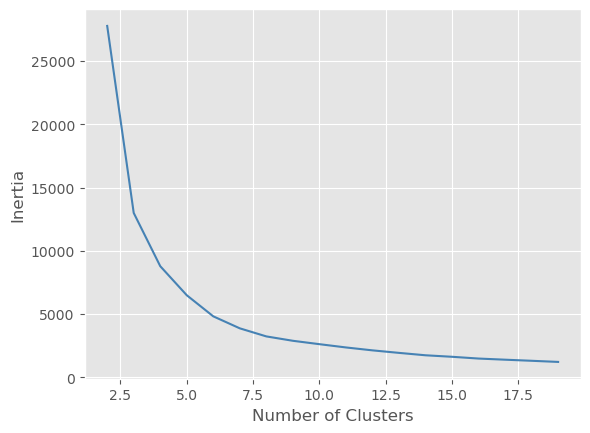

In [33]:
emission_series = train_no_outlier.pivot_table(index = ['year', 'week_no'], columns = ['location'], values = 'emission')

scaler = StandardScaler().set_output(transform = 'pandas')
df_cluster = emission_series.copy()
df_cluster = df_cluster.T
df_cluster = scaler.fit_transform(df_cluster)

krange = list(range(2, 20))
inertias = list()

for i in krange:

    cluster_md = KMeans(n_clusters = i, n_init = 20, random_state = 42, max_iter = 10000).fit(df_cluster)
    cluster_assignments = cluster_md.labels_
    inertias.append(cluster_md.inertia_)

plot = sns.lineplot(x = krange, y = inertias, color = 'steelblue')
plot.set(xlabel = 'Number of Clusters', ylabel = 'Inertia');

From the above, it seems that the elbow is around 5. So, we cluster the data into 5 clusters.

In [34]:
df_cluster['cluster'] = KMeans(n_clusters = 5, n_init = 20, random_state = 42, max_iter = 10000).fit(df_cluster).labels_
df_cluster['location'] = df_cluster.index
df_cluster = df_cluster[['location', 'cluster']].copy()
df_cluster.reset_index(drop = True, inplace = True)
df_cluster.head()

,location,cluster
0,-0.51_29.29,0
1,-0.528_29.472,0
2,-0.547_29.653,0
3,-0.569_30.031,2
4,-0.598_29.102,0


Next, we append the cluster labels to the `train` and `test` datasets.

In [35]:
train_no_outlier = pd.merge(train_no_outlier, df_cluster, on = 'location', how = 'left')
train_no_outlier['cluster'] = train_no_outlier['cluster'].astype('category')

test_no_outlier = pd.merge(test_no_outlier, df_cluster, on = 'location', how = 'left')
test_no_outlier['cluster'] = test_no_outlier['cluster'].astype('category')

Finally, we re-run the cv routine.

In [36]:
X = train_no_outlier[['year', 'week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos', 'cluster']].copy()
Y = train_no_outlier['emission']

test_baseline = test_no_outlier[['week_no', 'location', 'covid_flag', 'week_no_sin', 'week_no_cos', 'cluster']].copy()

lgb_cv_scores, lgb_preds = list(), list()

kf = GroupKFold(n_splits = 3)

for i, (trn_idx, test_idx) in enumerate(kf.split(X, groups = X.year)):
    
    X_train, X_valid = X.iloc[trn_idx], X.iloc[test_idx]
    Y_train, Y_valid = Y.iloc[trn_idx], Y.iloc[test_idx]
    
    X_train = X_train.drop(columns = 'year', axis = 1)
    X_valid = X_valid.drop(columns = 'year', axis = 1)
        
    print('---------------------------------------------------------------')
            
    ##############
    ## LightGBM ##
    ##############
    
    lgb_md = LGBMRegressor(n_estimators = 8455,
                           max_depth = 16,
                           learning_rate = 0.0088,
                           num_leaves = 14,
                           min_child_samples = 3,
                           reg_alpha = 0.1228, 
                           reg_lambda = 9.978,
                           subsample = 0.512,
                           colsample_bytree = 0.794).fit(X_train, Y_train)
    
    lgb_pred_1 = lgb_md.predict(X_valid)
    lgb_pred_2 = lgb_md.predict(test_baseline)
    
    lgb_score_fold = mean_squared_error(Y_valid, lgb_pred_1, squared = False)
    lgb_cv_scores.append(lgb_score_fold)
    lgb_preds.append(lgb_pred_2)
    
    print('Fold', i, '==> LGBM oof RMSE is ==>', lgb_score_fold)

print('\n')    
print('The oof RMSE of the model is', np.mean(lgb_cv_scores))

---------------------------------------------------------------
Fold 0 ==> LGBM oof RMSE is ==> 13.95335801346216
---------------------------------------------------------------
Fold 1 ==> LGBM oof RMSE is ==> 23.58884661990834
---------------------------------------------------------------
Fold 2 ==> LGBM oof RMSE is ==> 13.478009445823597


The oof RMSE of the model is 17.006738026398033


In [37]:
preds_test = pd.DataFrame(lgb_preds).apply(np.mean, axis = 0)
test_no_outlier = test_no_outlier.reset_index()
test_no_outlier['emission'] = preds_test
test_no_outlier['emission'] = np.where(test_no_outlier['emission'] < 0, 0, test_no_outlier['emission'])
test_no_outlier = test_no_outlier[['ID_LAT_LON_YEAR_WEEK', 'emission']].copy()
test_no_outlier.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.651829
1,ID_-0.510_29.290_2022_01,4.386236
2,ID_-0.510_29.290_2022_02,4.206161
3,ID_-0.510_29.290_2022_03,4.275121
4,ID_-0.510_29.290_2022_04,4.445039


In [38]:
test_outlier = test[np.isin(test['location'], outliers)].copy()
test_outlier['emission'] = np.nan
test_outlier.loc[test_outlier['location'] == '-2.079_29.321', 'emission'] = train[(train['location'] == '-2.079_29.321') & (train['year'] == 2021) & (train['week_no'] <= 48)]['emission'].values
test_outlier.loc[test_outlier['location'] == '-2.378_29.222', 'emission'] = train[(train['location'] == '-2.378_29.222') & (train['year'] != 2020) & (train['week_no'] <= 48)].groupby('week_no')['emission'].mean().values
test_outlier = test_outlier[['ID_LAT_LON_YEAR_WEEK', 'emission']].copy()
test_outlier

,ID_LAT_LON_YEAR_WEEK,emission
14357,ID_-2.079_29.321_2022_00,2351.35600
14358,ID_-2.079_29.321_2022_01,2715.36770
14359,ID_-2.079_29.321_2022_02,2751.97100
14360,ID_-2.079_29.321_2022_03,2806.08540
14361,ID_-2.079_29.321_2022_04,2845.54150
...,...,...
17537,ID_-2.378_29.222_2022_44,2325.10035
17538,ID_-2.378_29.222_2022_45,2361.00770
17539,ID_-2.378_29.222_2022_46,2381.86110
17540,ID_-2.378_29.222_2022_47,2449.02490


In [39]:
submission = pd.merge(submission, test_no_outlier, on = 'ID_LAT_LON_YEAR_WEEK', how = 'left')
submission = pd.merge(submission, test_outlier, on = 'ID_LAT_LON_YEAR_WEEK', how = 'left')
submission['emission'] = np.where(submission['emission'].isnull(), submission['emission_y'], submission['emission'])
submission = submission.drop(columns = ['emission_x', 'emission_y'], axis = 1)
submission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.651829
1,ID_-0.510_29.290_2022_01,4.386236
2,ID_-0.510_29.290_2022_02,4.206161
3,ID_-0.510_29.290_2022_03,4.275121
4,ID_-0.510_29.290_2022_04,4.445039


In [40]:
submission.to_csv('LightGBM_no_outlier_cluster.csv', index = False)